<a href="https://colab.research.google.com/github/RobertBobert562/14.10-LAB-Thesaurus/blob/main/notebook_csulb_data_day_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSULB Data Day 2025
*(Danton's Break Out Session)*


**Motivating Questions**
> Which compute instance profile strategy (`cost_efficient`, `balanced`, `performance`) would you recommend for each compute request scenarios (`low`, `normal`, `high`)?

> What if you could choose only one strategy?

### Learning Goals

* **Exposure to industry-inspired questions** about the cost and usage of compute infrastructure
* **Work with relevant data** (albiet simplified and simulated) virtually all tech companies are analyzing
* **Practice coding with AI** and understanding the trade-offs and pitfalls
  * AI Assistants are good enough that one can now "vibecode" (code using English)
  * This is *adventagous* for experienced data scientist but *can be disadvantagous* to newer ones
* **Learn about [`polars`](https://docs.pola.rs/api/python/stable/reference/index.html) and [`Claude AI`](https://claude.ai)**, my favorite package for working with data frames and my favorite AI assistant!
  * And [`plotnine`](https://plotnine.org/) for ggplot2-style ("grammar of graphics") plotting


In [2]:
# GOAL:
# - find the best instance allocation strategy for each request scenario: low, normal, high

# General Set Up
import polars as pl
import plotnine as p9

In [3]:
# prompt: read in a csv as `scenarios_df` with polars from a public repo url: `https://github.com/dantonnoriega/csulb-data-day-2025/blob/main/data/compute_request_scenarios.csv`
# tip: try_parse_dates=True

scenarios_df = pl.read_csv("https://raw.githubusercontent.com/dantonnoriega/csulb-data-day-2025/main/data/compute_request_scenarios.csv", try_parse_dates=True)
print(scenarios_df)

shape: (13_032, 3)
┌─────────────────────┬──────────┬──────────┐
│ datetime            ┆ scenario ┆ requests │
│ ---                 ┆ ---      ┆ ---      │
│ datetime[μs]        ┆ str      ┆ i64      │
╞═════════════════════╪══════════╪══════════╡
│ 2023-01-01 00:00:00 ┆ normal   ┆ 2519     │
│ 2023-01-01 01:00:00 ┆ normal   ┆ 1577     │
│ 2023-01-01 02:00:00 ┆ normal   ┆ 1277     │
│ 2023-01-01 03:00:00 ┆ normal   ┆ 921      │
│ 2023-01-01 04:00:00 ┆ normal   ┆ 781      │
│ …                   ┆ …        ┆ …        │
│ 2023-06-30 19:00:00 ┆ low      ┆ 14314    │
│ 2023-06-30 20:00:00 ┆ low      ┆ 14153    │
│ 2023-06-30 21:00:00 ┆ low      ┆ 11300    │
│ 2023-06-30 22:00:00 ┆ low      ┆ 11039    │
│ 2023-06-30 23:00:00 ┆ low      ┆ 8149     │
└─────────────────────┴──────────┴──────────┘


```
# prompt: add a "year-month" column `ym` using column `datetime` to data frame `scenarios_df`
# tip: if  needed `print(scenarios_df)`
```

In [4]:
# prompt: add a "year-month" column `ym` using column `datetime` to data frame `scenarios_df`

scenarios_df = scenarios_df.with_columns(
    pl.col("datetime").dt.strftime("%Y-%m").alias("ym")
)

print(scenarios_df)

shape: (13_032, 4)
┌─────────────────────┬──────────┬──────────┬─────────┐
│ datetime            ┆ scenario ┆ requests ┆ ym      │
│ ---                 ┆ ---      ┆ ---      ┆ ---     │
│ datetime[μs]        ┆ str      ┆ i64      ┆ str     │
╞═════════════════════╪══════════╪══════════╪═════════╡
│ 2023-01-01 00:00:00 ┆ normal   ┆ 2519     ┆ 2023-01 │
│ 2023-01-01 01:00:00 ┆ normal   ┆ 1577     ┆ 2023-01 │
│ 2023-01-01 02:00:00 ┆ normal   ┆ 1277     ┆ 2023-01 │
│ 2023-01-01 03:00:00 ┆ normal   ┆ 921      ┆ 2023-01 │
│ 2023-01-01 04:00:00 ┆ normal   ┆ 781      ┆ 2023-01 │
│ …                   ┆ …        ┆ …        ┆ …       │
│ 2023-06-30 19:00:00 ┆ low      ┆ 14314    ┆ 2023-06 │
│ 2023-06-30 20:00:00 ┆ low      ┆ 14153    ┆ 2023-06 │
│ 2023-06-30 21:00:00 ┆ low      ┆ 11300    ┆ 2023-06 │
│ 2023-06-30 22:00:00 ┆ low      ┆ 11039    ┆ 2023-06 │
│ 2023-06-30 23:00:00 ┆ low      ┆ 8149     ┆ 2023-06 │
└─────────────────────┴──────────┴──────────┴─────────┘


```
# prompt: reorder columns in `scenarios_df` as `datetime`, `ym`, `scenario`, `requests`
```

In [5]:
# prompt: reorder columns in `scenarios_df` as `datetime`, `ym`, `scenario`, `requests`

scenarios_df = scenarios_df.select(["datetime", "ym", "scenario", "requests"])
scenarios_df


datetime,ym,scenario,requests
datetime[μs],str,str,i64
2023-01-01 00:00:00,"""2023-01""","""normal""",2519
2023-01-01 01:00:00,"""2023-01""","""normal""",1577
2023-01-01 02:00:00,"""2023-01""","""normal""",1277
2023-01-01 03:00:00,"""2023-01""","""normal""",921
2023-01-01 04:00:00,"""2023-01""","""normal""",781
…,…,…,…
2023-06-30 19:00:00,"""2023-06""","""low""",14314
2023-06-30 20:00:00,"""2023-06""","""low""",14153
2023-06-30 21:00:00,"""2023-06""","""low""",11300


```
# prompt: sum `requests` by `ym` and `scenario`, sort, then save as object `scenarios_by_ym_df
```

In [7]:
# prompt: sum `requests` by `ym` and `scenario`, sort, then save as object `scenarios_by_ym_df

scenarios_by_ym_df = scenarios_df.group_by(["ym", "scenario"]).agg(pl.col("requests").sum()).sort("requests", descending=True)

print(scenarios_by_ym_df)


shape: (18, 3)
┌─────────┬──────────┬──────────┐
│ ym      ┆ scenario ┆ requests │
│ ---     ┆ ---      ┆ ---      │
│ str     ┆ str      ┆ i64      │
╞═════════╪══════════╪══════════╡
│ 2023-06 ┆ high     ┆ 19091652 │
│ 2023-05 ┆ high     ┆ 18352133 │
│ 2023-04 ┆ high     ┆ 15791416 │
│ 2023-03 ┆ high     ┆ 15426309 │
│ 2023-01 ┆ high     ┆ 13233871 │
│ …       ┆ …        ┆ …        │
│ 2023-02 ┆ normal   ┆ 8203757  │
│ 2023-04 ┆ low      ┆ 7010618  │
│ 2023-03 ┆ low      ┆ 6751210  │
│ 2023-01 ┆ low      ┆ 5926782  │
│ 2023-02 ┆ low      ┆ 5742298  │
└─────────┴──────────┴──────────┘


```
# prompt: use polars `.sql` to sum `requests` in dataframe `scenarios_df` grouped by `ym` and `scenario`, sort, then save as object `scenarios_by_ym_df`
# !!! (edits likely required)
```


In [20]:
# prompt: use polars `.sql` to sum `requests` in dataframe `scenarios_df` grouped by `ym` and `scenario`, sort, then save as object `scenarios_by_ym_df`
scenarios_by_ym_df = scenarios_df.sql("""
    SELECT
        ym,
        scenario,
        SUM(requests) as total_requests_per_ym_per_scenario
    FROM self
    GROUP BY ym, scenario
    ORDER BY ym, total_requests_per_ym_per_scenario DESC
""")

scenarios_by_ym_df


ym,scenario,total_requests_per_ym_per_scenario
str,str,i64
"""2023-01""","""high""",13233871
"""2023-01""","""normal""",8467319
"""2023-01""","""low""",5926782
"""2023-02""","""high""",12981016
"""2023-02""","""normal""",8203757
…,…,…
"""2023-05""","""normal""",11808854
"""2023-05""","""low""",8265850
"""2023-06""","""high""",19091652


```
# prompt: create a bar plot with x = "ym" and y = "requests" grouped by "scenario" using dataframe `scenarios_by_ym_df` with minimal theme
```


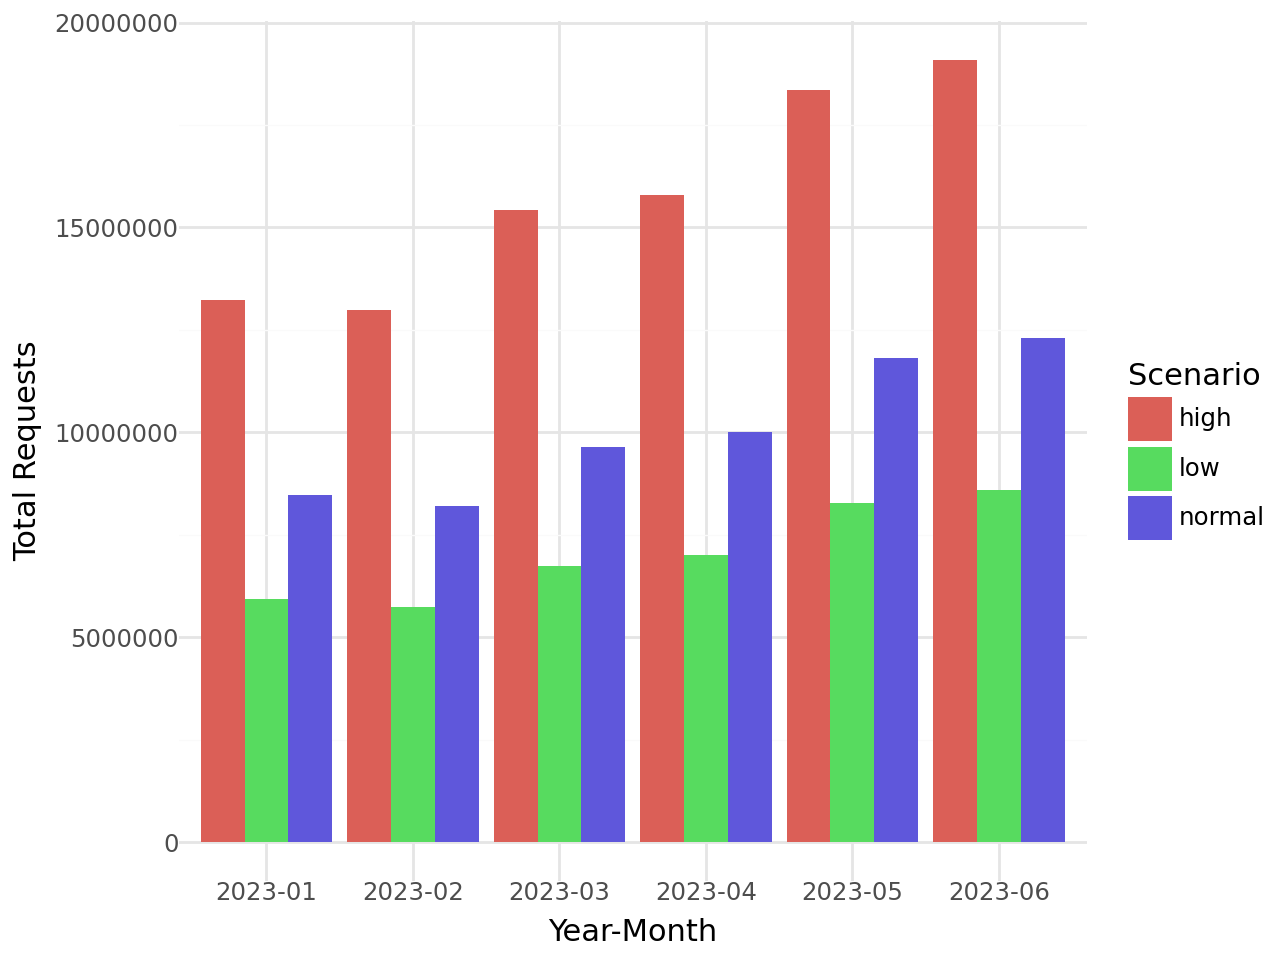

In [21]:
# prompt: create a bar plot with x = "ym" and y = "requests" grouped by "scenario" using dataframe `scenarios_by_ym_df` with minimal theme

import polars as pl
import plotnine as p9

# Assuming scenarios_by_ym_df is already defined as in the previous code blocks

(
    p9.ggplot(scenarios_by_ym_df, p9.aes(x="ym", y="total_requests_per_ym_per_scenario", fill="scenario"))
    + p9.geom_bar(stat="identity", position="dodge")
    + p9.theme_minimal()
    + p9.labs(x="Year-Month", y="Total Requests", fill="Scenario")
)


```
# prompt: filter data frame `scenarios_df` to the first week of data then create a line plot using plotnine grouped by `scenario` with x = "datetime" and y = "requests"
```

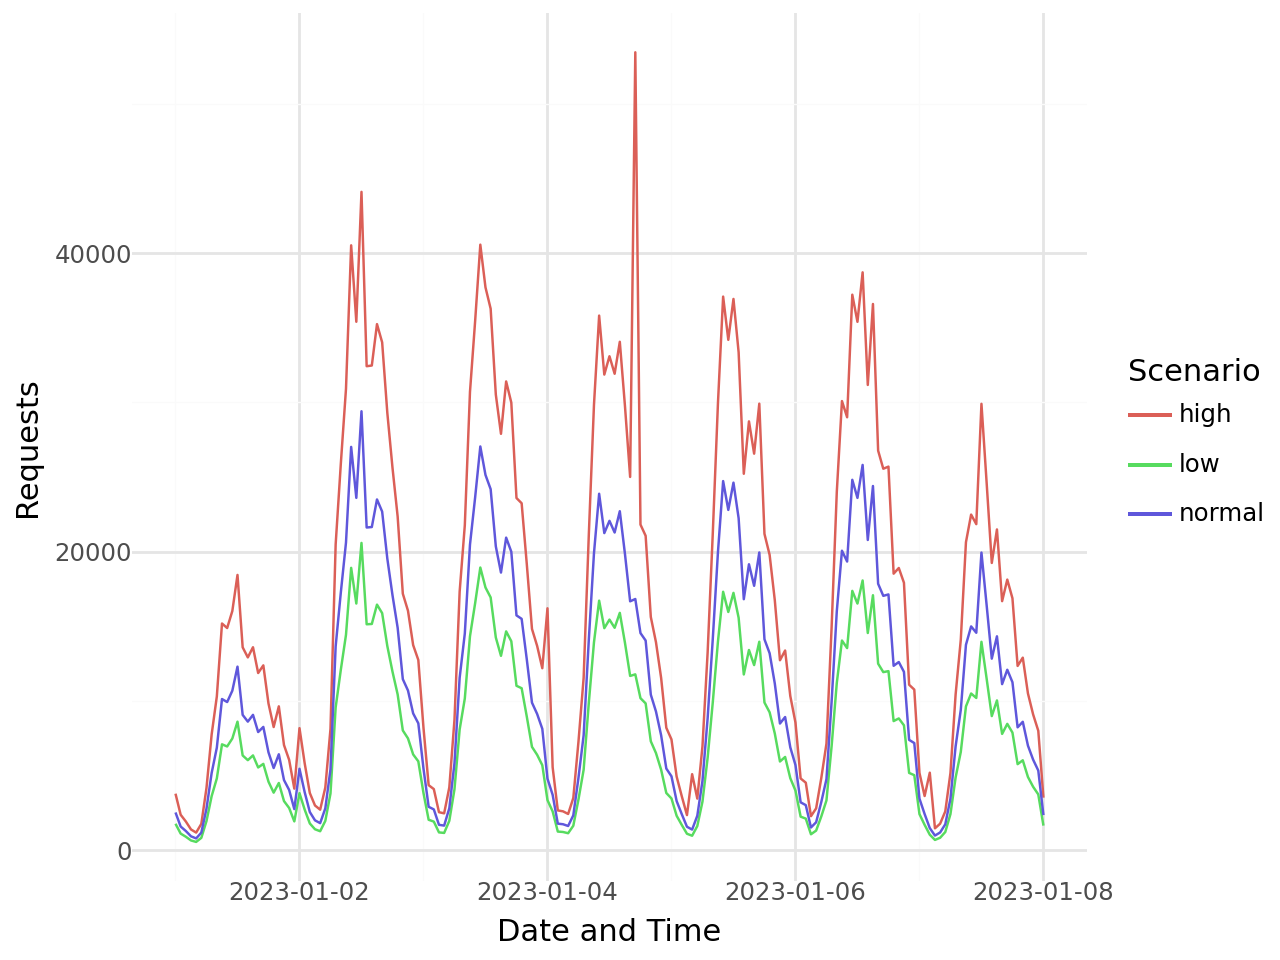

In [22]:
# prompt: filter data frame `scenarios_df` to the first week of data then create a line plot using plotnine grouped by `scenario` with x = "datetime" and y = "requests"

import polars as pl
import plotnine as p9

# Assuming scenarios_df is already loaded as in the previous code blocks

# Filter to the first week of data (assuming datetime is sorted)
first_week_df = scenarios_df.filter(pl.col("datetime") <= pl.col("datetime").min() + pl.duration(days=7))

# Create the line plot
(
    p9.ggplot(first_week_df, p9.aes(x="datetime", y="requests", color="scenario"))
    + p9.geom_line()
    + p9.theme_minimal()
    + p9.labs(x="Date and Time", y="Requests", color="Scenario")
)


## Determine Allocations (Challenge)

In [23]:
# Instance Allocation Strategies ----------------------

# Strategy 1: Cost Efficiency - Many smaller instances
cost_efficiency_allocation = {
    "micro": 25,
    "small": 20,
    "medium": 17,
    "large": 6,
    "xlarge": 1
}

# Strategy 2: Performance - Fewer, more powerful instances
performance_allocation = {
    "micro": 0,
    "small": 0,
    "medium": 0,
    "large": 6,
    "xlarge": 15
}

# Strategy 3: Balanced - Mix of instance types
balanced_allocation = {
    "micro": 10,
    "small": 15,
    "medium": 8,
    "large": 5,
    "xlarge": 7
}

In [27]:
# instruction (try not to use AI here):
## - read the csv file at https://github.com/dantonnoriega/csulb-data-day-2025/blob/main/data/compute_instance_profiles.csv
## - to object named `instances_df` and print it


# [WRITE YOUR CODE HERE]

instances_df = pl.read_csv("https://raw.githubusercontent.com/dantonnoriega/csulb-data-day-2025/main/data/compute_instance_profiles.csv")
print(instances_df)

shape: (5, 3)
┌───────────────┬───────────────────┬───────────────┐
│ instance_type ┆ requests_per_hour ┆ cost_per_hour │
│ ---           ┆ ---               ┆ ---           │
│ str           ┆ i64               ┆ f64           │
╞═══════════════╪═══════════════════╪═══════════════╡
│ micro         ┆ 100               ┆ 0.012         │
│ small         ┆ 250               ┆ 0.024         │
│ medium        ┆ 600               ┆ 0.048         │
│ large         ┆ 1500              ┆ 0.096         │
│ xlarge        ┆ 4000              ┆ 0.192         │
└───────────────┴───────────────────┴───────────────┘


```
# prompt: create a new polars dataframe with columns `strategy`, `hourly_capacity`, `hourly_cost` that iterates over dicts `cost_efficiency_allocation`, `performance_allocation`, `balanced_allocation` and matches keys to column `instance_type` in dataframe `instances_df` with columns `instance_type`, `requests_per_hour`, `cost_per_hour`
# !!! (edits required)
```

In [38]:
# Create allocation strategies list
allocation_strategies = [
    {"strategy": "Cost Efficiency", "instances": cost_efficiency_allocation},
    {"strategy": "Performance", "instances": performance_allocation},
    {"strategy": "Balanced", "instances": balanced_allocation}
]

# Prepare data for the new DataFrame
strategy_data = []

for strategy_entry in allocation_strategies:
    strategy = strategy_entry["strategy"]
    instances = strategy_entry["instances"]

    for instance_type in instances:
        # Find matching instance in instances_df
        matching_instance = instances_df.filter(pl.col("instance_type") == instance_type)

        if not matching_instance.is_empty():
            hourly_capacity = matching_instance["requests_per_hour"].item()
            hourly_cost = matching_instance["cost_per_hour"].item()

            strategy_data.append({
                "strategy": strategy,
                "instance_type": instance_type,
                "hourly_capacity": hourly_capacity,
                "hourly_cost": hourly_cost
            })

# Create the new DataFrame
allocation_strategies_df = pl.DataFrame(strategy_data)

print(allocation_strategies_df)

shape: (0, 0)
┌┐
╞╡
└┘


```
# prompt: filter data frame `scenarios_df` to the second month of data then create a line plot using plotnine grouped by `scenario` with x = "datetime" and y = "requests". finally, layer in horizontal lines where y = "hourly_capacity" grouped by `strategy`
# !!! (edits required)
```

```
# prompt: determine the overall `service_rate = 1 - (unserved_requests / total_requests)` for each strategy and scenario, where `unserved_requests` are all hourly requests above `hourly_capacity` and zero otherwise
# !!! (edits required)
```


## Solution

In [ ]:
import polars as pl
import io

# Paste your CSV data here
csv_data = """scenario,strategy,service_rate
high,balanced,0.9548
high,cost_efficiency,0.8402
high,performance,0.9912
low,balanced,1.0
low,cost_efficiency,0.9999
low,performance,1.0
normal,balanced,0.9999
normal,cost_efficiency,0.98
normal,performance,1.0
"""

# Create a BytesIO object from the string
csv_file = io.StringIO(csv_data)

# Read the CSV data into a Polars DataFrame
service_rate_df = pl.read_csv(csv_file)
print(service_rate_df.sort(['strategy','scenario']))

shape: (9, 3)
┌──────────┬─────────────────┬──────────────┐
│ scenario ┆ strategy        ┆ service_rate │
│ ---      ┆ ---             ┆ ---          │
│ str      ┆ str             ┆ f64          │
╞══════════╪═════════════════╪══════════════╡
│ high     ┆ balanced        ┆ 0.9548       │
│ low      ┆ balanced        ┆ 1.0          │
│ normal   ┆ balanced        ┆ 0.9999       │
│ high     ┆ cost_efficiency ┆ 0.8402       │
│ low      ┆ cost_efficiency ┆ 0.9999       │
│ normal   ┆ cost_efficiency ┆ 0.98         │
│ high     ┆ performance     ┆ 0.9912       │
│ low      ┆ performance     ┆ 1.0          │
│ normal   ┆ performance     ┆ 1.0          │
└──────────┴─────────────────┴──────────────┘
